In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [45]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
idx = pd.IndexSlice

import seaborn as sns
import investpy
import pyfolio as pf

import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
np.random.seed(42)

In [4]:
DATA_STORE = 'data/mom_results.h5'

In [5]:
with pd.HDFStore(DATA_STORE) as store:
    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: data/mom_results.h5
/nse100/daily/results                              frame        (shape->[2723,3])
/nse100/eq_wts/daily/positions                     frame        (shape->[2728,2])
/nse100/eq_wts/daily/returns                       series       (shape->[2728])  
/nse100/eq_wts/daily/transactions                  frame        (shape->[2214,5])
/nse100/eq_wts/monthly/positions                   frame        (shape->[2728,2])
/nse100/eq_wts/monthly/returns                     series       (shape->[2728])  
/nse100/eq_wts/monthly/transactions                frame        (shape->[1894,5])
/nse100/eq_wts/weekly/positions                    frame        (shape->[2728,2])
/nse100/eq_wts/weekly/returns                      series       (shape->[2728])  
/nse100/eq_wts/weekly/transactions                 frame        (shape->[2110,5])
/nse100/monthly/results                            frame        (shape->[2723,3])
/nse100/riskparity/daily/posi

In [6]:
with pd.HDFStore(DATA_STORE) as store:
    rebalance_daily = (store['/nse100/daily/results'])
    rebalance_weekly = (store['/nse100/weekly/results'])
    rebalance_monthly = (store['/nse100/monthly/results'])

In [8]:
rebalance_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2723 entries, 2010-01-04 00:00:00+00:00 to 2020-12-24 00:00:00+00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stra_eqw    2723 non-null   float64
 1   market      2723 non-null   float64
 2   stra_riskp  2723 non-null   float64
dtypes: float64(3)
memory usage: 85.1 KB


In [9]:
rebalance_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2723 entries, 2010-01-04 00:00:00+00:00 to 2020-12-24 00:00:00+00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stra_eqw    2723 non-null   float64
 1   market      2723 non-null   float64
 2   stra_riskp  2723 non-null   float64
dtypes: float64(3)
memory usage: 85.1 KB


In [10]:
rebalance_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2723 entries, 2010-01-04 00:00:00+00:00 to 2020-12-24 00:00:00+00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stra_eqw    2723 non-null   float64
 1   market      2723 non-null   float64
 2   stra_riskp  2723 non-null   float64
dtypes: float64(3)
memory usage: 85.1 KB


In [27]:
columns = ['stra_eqw_d', 'stra_riskp_d', 'stra_eqw_w', 'stra_riskp_w','stra_eqw_m','stra_riskp_m','nifty100']
results_all = pd.DataFrame(list(zip(rebalance_daily.stra_eqw, 
                            rebalance_daily.stra_riskp,
                            rebalance_weekly.stra_eqw,
                            rebalance_weekly.stra_riskp,
                            rebalance_monthly.stra_eqw,
                            rebalance_monthly.stra_riskp,
                            rebalance_daily.market)), columns=columns,index=rebalance_daily.index)
results_all.head()

,stra_eqw_d,stra_riskp_d,stra_eqw_w,stra_riskp_w,stra_eqw_m,stra_riskp_m,nifty100
Date,,,,,,,
2010-01-04 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.006936
2010-01-05 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.009751
2010-01-06 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.001960
2010-01-07 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.004277
2010-01-08 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,-0.003072


### Benchmark - Nifty100

In [29]:
# Performance of benchmark on key parameters
pf.show_perf_stats(results_all.nifty100)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,9.66%
Cumulative returns,170.847%
Annual volatility,17.227%
Sharpe ratio,0.62
Calmar ratio,0.25
Stability,0.90
Max drawdown,-38.104%


### Strategy - Equal Weight Daily Rebalance

In [30]:
pf.show_perf_stats(results_all.stra_eqw_d)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,16.358%
Cumulative returns,413.985%
Annual volatility,16.731%
Sharpe ratio,0.99
Calmar ratio,0.52
Stability,0.93
Max drawdown,-31.291%


### Strategy - Risk Parity Weight Daily Rebalance

In [31]:
pf.show_perf_stats(results_all.stra_riskp_d)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,16.874%
Cumulative returns,439.195%
Annual volatility,15.94%
Sharpe ratio,1.06
Calmar ratio,0.58
Stability,0.95
Max drawdown,-29.107%


### Strategy - Equal Weight Weekly Rebalance

In [32]:
pf.show_perf_stats(results_all.stra_eqw_w)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,14.601%
Cumulative returns,336.08%
Annual volatility,17.745%
Sharpe ratio,0.86
Calmar ratio,0.44
Stability,0.94
Max drawdown,-33.538%


### Strategy - Risk Parity Weekly Rebalance

In [33]:
pf.show_perf_stats(results_all.stra_riskp_w)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,14.601%
Cumulative returns,336.078%
Annual volatility,16.08%
Sharpe ratio,0.93
Calmar ratio,0.38
Stability,0.93
Max drawdown,-38.072%


### Strategy - Equal Weight Monthly Rebalance

In [34]:
pf.show_perf_stats(results_all.stra_eqw_m)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,13.943%
Cumulative returns,309.787%
Annual volatility,17.148%
Sharpe ratio,0.85
Calmar ratio,0.41
Stability,0.93
Max drawdown,-34.03%


### Strategy - Risk Parity Monthly Rebalance

In [35]:
pf.show_perf_stats(results_all.stra_riskp_m)

Start date,2010-01-04
End date,2020-12-24
Total months,129
,Backtest
Annual return,15.333%
Cumulative returns,367.122%
Annual volatility,16.074%
Sharpe ratio,0.97
Calmar ratio,0.45
Stability,0.94
Max drawdown,-34.233%


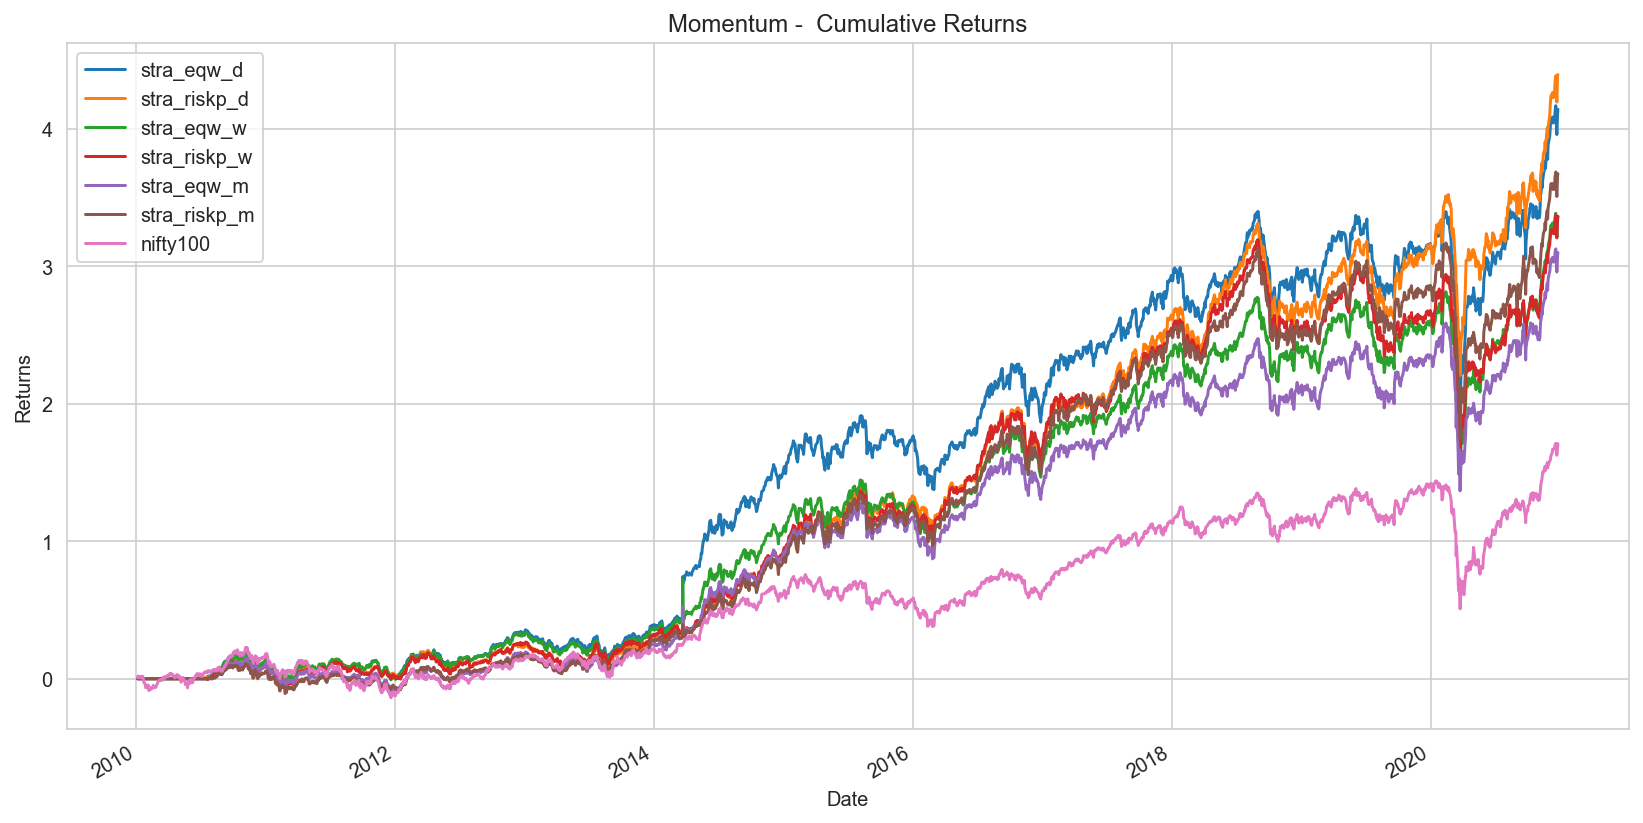

In [43]:
# Visulize the output

ax = ((1 * results_all + 1).cumprod()-1).plot(figsize=(14,7), title='Momentum -  Cumulative Returns')
ax.set_ylabel('Returns')
ax.grid(True)
ax.legend();

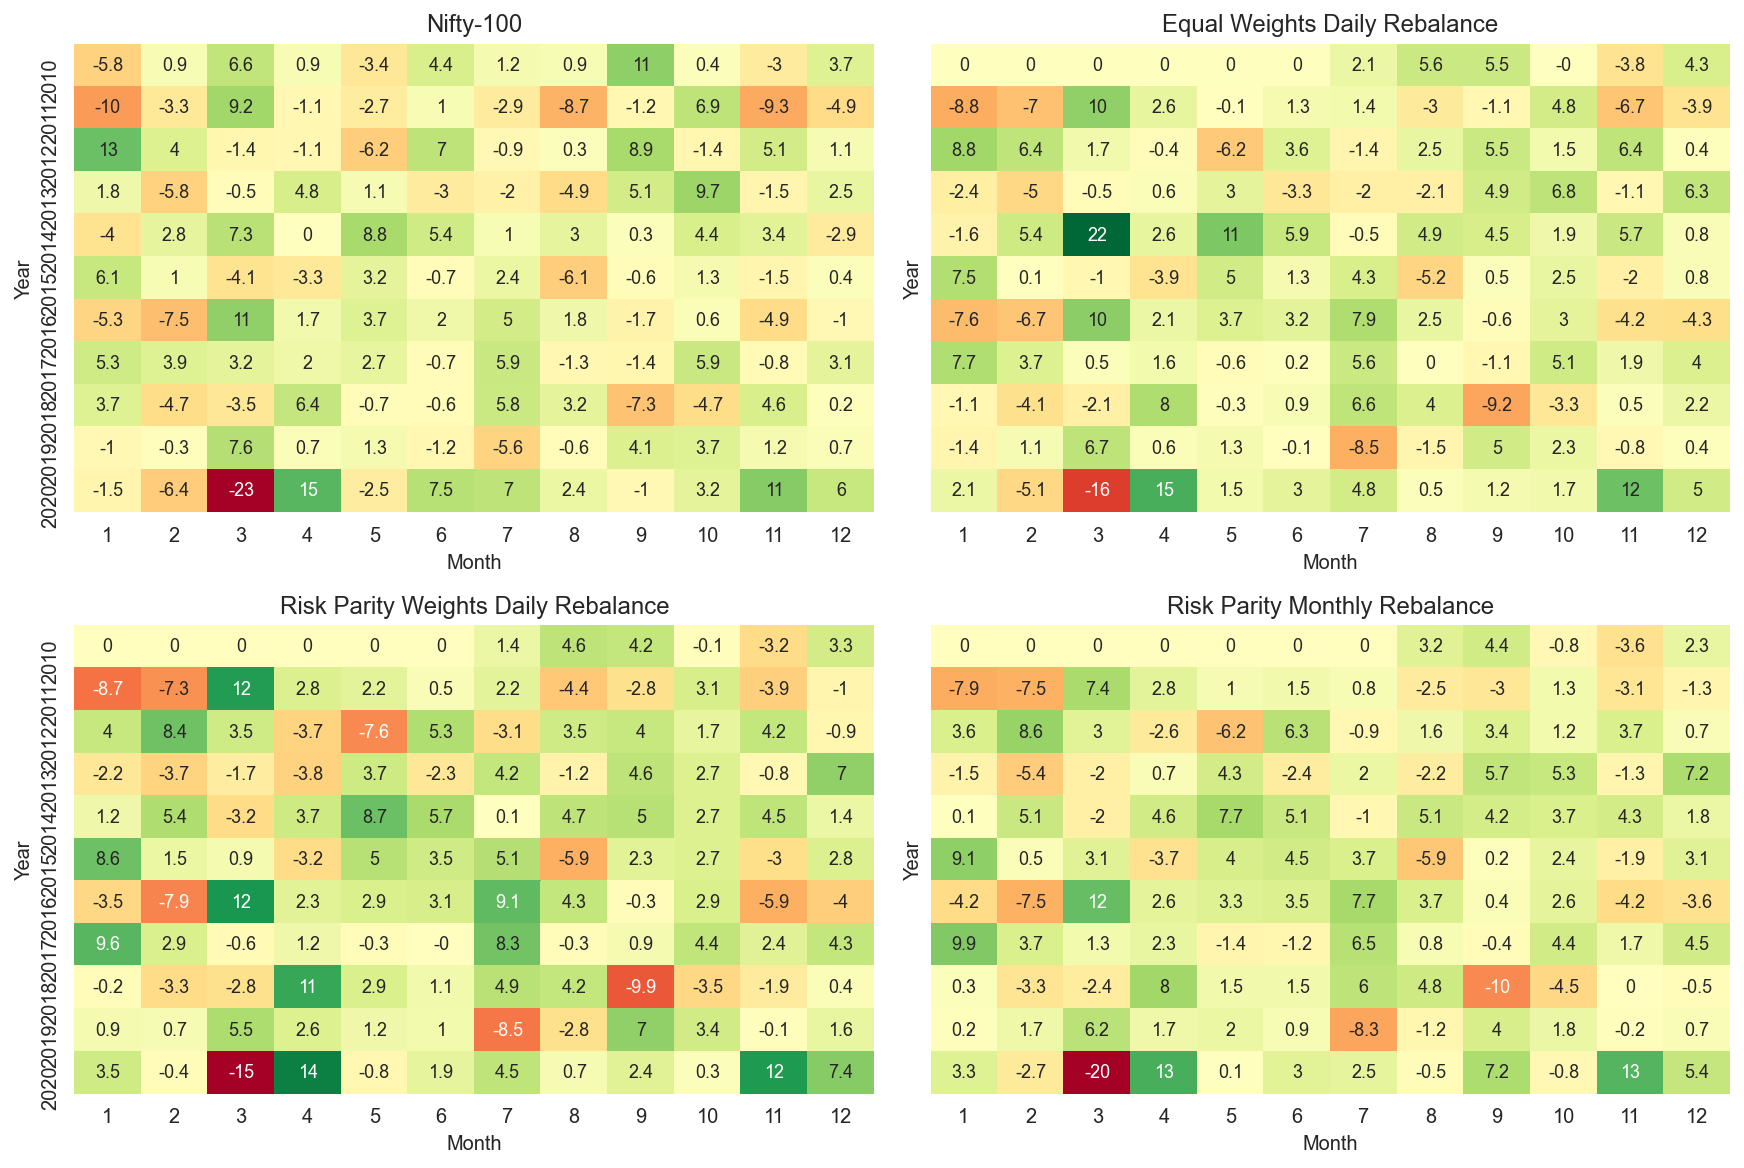

In [49]:
# plot performance
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8),constrained_layout=True, sharey=True)
axes = ax.flatten()

pf.plot_monthly_returns_heatmap(returns=results_all.nifty100, ax=axes[0])
axes[0].grid(True)
axes[0].set_title('Nifty-100')

pf.plot_monthly_returns_heatmap(returns=results_all.stra_eqw_d, ax=axes[1])
axes[1].grid(True)
axes[1].set_title('Equal Weights Daily Rebalance')

pf.plot_monthly_returns_heatmap(returns=results_all.stra_riskp_d, ax=axes[2])
axes[2].grid(True)
axes[2].set_title('Risk Parity Weights Daily Rebalance')

pf.plot_monthly_returns_heatmap(returns=results_all.stra_riskp_m, ax=axes[3])
axes[3].grid(True)
axes[3].set_title('Risk Parity Monthly Rebalance');

# fig.suptitle('Strategy vs Nifty-100 - 2', fontsize=16, y=1.0)